# Sentiment Analysis Part 1

## Amazon Kindle Reviews

By Noha Lakhdimi and Jihane Fettoukh

## Contents

1. Overview
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing and Cleaning

## Overview
This project focuses on building and evaluating an **Artificial Neural Network (ANN)** model to perform **sentiment analysis** on customer reviews from the **Amazon Kindle Store category**. The dataset contains **982,619 reviews** collected between May 1996 and July 2014. Each review includes textual content, ratings, and metadata related to helpfulness.

The main goal of the project is to use the review text to classify the sentiment (e.g., positive vs negative) using an ANN model. The ANN learns patterns in the natural language data to automatically predict the sentiment associated with each review.

### Dataset Description

The dataset contains product reviews from Amazon's Kindle Store, where each reviewer has written at least five reviews, and each product has at least five reviews. The columns in the dataset include:

1. **asin** - Product ID (e.g., `B000FA64PK`).
2. **helpful** - Helpfulness rating of the review (e.g., `2/3` indicates two users found it helpful out of three).
3. **overall** - Rating of the product, typically ranging from 1 to 5 stars.
4. **reviewText** - Text content of the review (the main body of the review).
5. **reviewTime** - Raw time when the review was submitted.
6. **reviewerID** - ID of the reviewer (e.g., `A3SPTOKDG7WBLN`).
7. **reviewerName** - Name of the reviewer.
8. **summary** - Summary or brief description of the review.
9. **unixReviewTime** - Unix timestamp of when the review was posted.

#### Data Size:
- Total entries: 982,619
- Each reviewer has at least 5 reviews.
- Each product has at least 5 reviews.

## Exploratory Data Analysis (EDA)

Before applying any cleaning or preprocessing, an initial EDA was performed to understand the raw dataset and identify potential issues. The main steps included:
1. Dataset Structure Check
2. Rating Distribution Analysis
3. Text Content Exploration

In [84]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import ast

import string
import nltk
from nltk.stem import WordNetLemmatizer

import re
from collections import Counter
from langdetect import detect, DetectorFactory
from textblob import TextBlob

from revised_stopwords import get_revised_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NOHAJAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 1. Dataset Structure Check
- Inspecting data types, missing values, and duplicated rows.  
- Verifying column consistency and reviewing sample entries.

In [3]:
# Load the dataset and preview the first 5 rows

df = pd.read_csv('kindle_reviews.csv')
df.shape   # Check if dataset loaded correctly and matches expected size

(982619, 10)

In [4]:
# Preview the first 5 rows

df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [5]:
# Preview the last 5 rows

df.tail()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
982614,982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600
982615,982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600
982616,982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600
982617,982617,B00M13FNSS,"[0, 0]",5,When I say this was an excellent book please b...,"07 23, 2014",A1BQO66R6OLCCW,Nikey,Wow!!,1406073600
982618,982618,B00M13FNSS,"[2, 2]",5,This book was everything. I just hope Alexus w...,"07 23, 2014",A2NRGE3CSFY2TQ,Yo,Great read.hands down #5star hit,1406073600


In [6]:
# Check the dataset structure and data types
# This helps identify missing values and understand which columns need cleaning or conversion.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982619 entries, 0 to 982618
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      982619 non-null  int64 
 1   asin            982619 non-null  object
 2   helpful         982619 non-null  object
 3   overall         982619 non-null  int64 
 4   reviewText      982597 non-null  object
 5   reviewTime      982619 non-null  object
 6   reviewerID      982619 non-null  object
 7   reviewerName    978797 non-null  object
 8   summary         982500 non-null  object
 9   unixReviewTime  982619 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 75.0+ MB


> **Note:**
>
> During the structure inspection, it was observed that some columns were stored as `object` types instead of their proper formats.  
> - The **`reviewTime`** column is stored as a string and must be converted to a `datetime` type for temporal analysis.  
> - The **`helpful`** column is stored as a string representation of a list (e.g., `"[2, 3]"`) and needs to be converted back into a numerical list before computing helpfulness ratios.  
> These conversions will be applied later during the preprocessing phase.

In [38]:
# Summary Statistics

df.describe(include="all")

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
count,982619.000000,982619,982619,982619.000000,982597,982619,982619,978797,982500,9.826190e+05
unique,NaN,61934,1494,NaN,982267,2117,68223,55476,623239,NaN
top,NaN,B006GWO5WK,"[0, 0]",NaN,Good book,"07 7, 2014",A13QTZ8CIMHHG4,Amazon Customer,Good read,NaN
freq,NaN,1113,530329,NaN,10,2728,1173,53811,3568,NaN
mean,491309.000000,NaN,NaN,4.347801,NaN,NaN,NaN,NaN,NaN,1.378183e+09
std,283657.816418,NaN,NaN,0.955056,NaN,NaN,NaN,NaN,NaN,2.298476e+07
min,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,9.522144e+08
25%,245654.500000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,1.365206e+09
50%,491309.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,1.383523e+09
75%,736963.500000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,1.396051e+09


In [8]:
# Check for missing values in each column

missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText          22
reviewTime           0
reviewerID           0
reviewerName      3822
summary            119
unixReviewTime       0
dtype: int64


In [12]:
# Proportion of missing values per column

missing_values = df.isnull().mean()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Unnamed: 0        0.000000
asin              0.000000
helpful           0.000000
overall           0.000000
reviewText        0.000022
reviewTime        0.000000
reviewerID        0.000000
reviewerName      0.003890
summary           0.000121
unixReviewTime    0.000000
dtype: float64


In [10]:
empty_reviews = df[df['reviewText'].astype(str).str.strip() == ""]
empty_reviews.shape

(0, 10)

> **Note:**
>  
> The dataset contains a small number of missing entries in `reviewText` (22 rows), `summary` (119 rows), and a larger number in `reviewerName` (3,822 rows).  
> An additional check for empty review texts confirmed that there are **no rows with empty strings** in `reviewText`.  
> 
> These missing values will be handled during preprocessing.  
> - Missing or null `reviewText` entries will be removed, as they cannot be used for sentiment analysis.  
> - Missing `summary` values may optionally be left as-is or replaced with an empty string.  
> - Missing `reviewerName` values are not relevant to model training and can safely be ignored or dropped if needed.


In [14]:
# Check for duplicate reviews

duplicates = df.duplicated().sum()
print(f"Number of duplicate review entries: {duplicates}")

Number of duplicate review entries: 0


> **Note:**
> 
> No duplicate rows were found in the dataset (`0` duplicated entries).  
> This indicates that each review appears to be unique, and no deduplication is required during preprocessing.

In [15]:
# Unique values per column

unique_values = df.overall.nunique()
print("Unique values per column:\n", unique_values)

Unique values per column:
 5


>**Note:**
>
> The **'overall'** column contains **5 unique rating values** ranging from **1 to 5**.  
> These represent the original Amazon review ratings.  
>  
> For sentiment analysis, we will later convert these 5 ratings into **3 sentiment categories**:  
> - **1–2 → Negative sentiment (-1)**  
> - **3 → Neutral sentiment (0)**  
> - **4–5 → Positive sentiment (1)**  
>  
> This transformation helps simplify the model and turn the problem into a **3–class classification task**.

#### 2. Rating Distribution Analysis
- Counting and visualizing the number of reviews for each rating (1–5).  
- Checking for class imbalance that may affect model training.

In [16]:
# Calculates the percentage of reviews for each rating (1–5)

df['overall'].value_counts(normalize=True) * 100

overall
5    58.543952
4    25.850609
3     9.789552
2     3.473371
1     2.342515
Name: proportion, dtype: float64

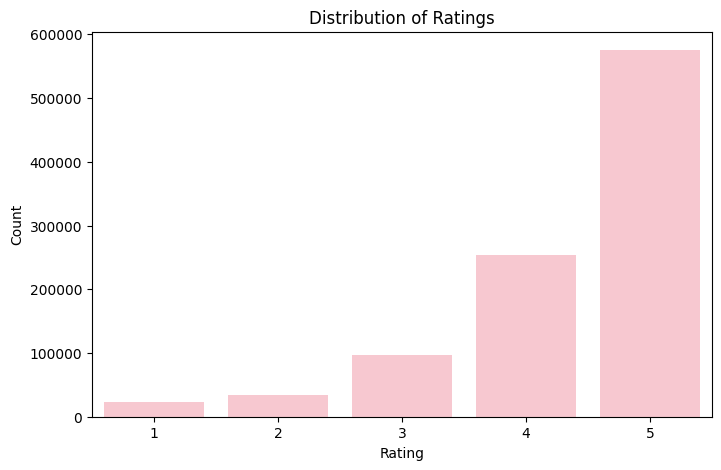

In [17]:
# Plots a bar chart showing the count of reviews for each rating (1–5)

plt.figure(figsize=(8,5))
sns.countplot(x=df['overall'], order=sorted(df['overall'].unique()), color='pink')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

> **Note:**
> 
> The dataset is heavily skewed toward positive reviews (4-5 stars \~84%), while negative reviews (1-2 stars) are underrepresented (\~6%).  
> During cleaning, care must be taken not to disproportionately remove minority class reviews, as this could worsen the imbalance.  

#### 3. Text Content Exploration
- Generating word clouds for negative (1-2), neutral (3), and positive (4-5) reviews.  
- Identifying domain-specific frequent words and potential noise (e.g., emojis, special characters, URLs).  
- Checking for non-English characters or encoding issues.

Total non-English characters found: 1399617
Number of unique non-English characters: 25
Unique non-English characters: {'#', '~', '}', '\x06', '\x11', '\x16', '$', '_', '\x12', '%', '|', '\x04', '`', '{', '\x02', '&', '+', '\x10', '=', '>', '/', '*', '@', '\\', '^'}
Most common non-English characters: [('&', 573705), ('#', 508496), ('*', 139391), ('/', 90355), ('~', 17735), ('`', 12426), ('%', 12344), ('$', 11925), ('_', 9734), ('+', 9131), ('=', 5116), ('>', 3166), ('@', 3010), ('^', 927), ('}', 872), ('{', 779), ('|', 258), ('\\', 234), ('\x06', 3), ('\x12', 2)]


C:\Users\NOHAJAD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 6 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NOHAJAD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 18 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


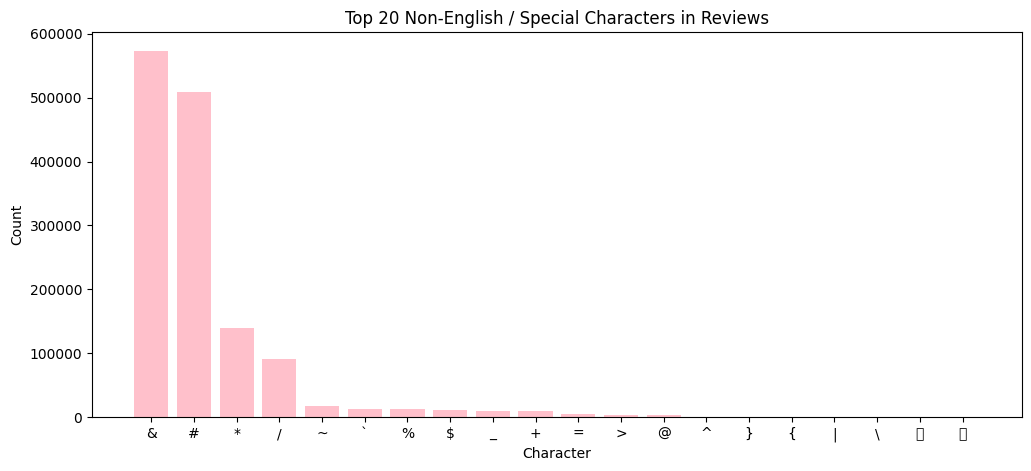

In [19]:
# Combine all reviews
all_text = ' '.join(df['reviewText'].astype(str))

# Find all non-English characters (anything not a-z, A-Z, 0-9, common punctuation, whitespace)
non_english_chars = re.findall(r"[^A-Za-z0-9\s.,!?;:'\"()\-\[\]]", all_text) 

# Total number of non-English characters
total_count = len(non_english_chars)

# Unique non-English characters
unique_chars = set(non_english_chars)
num_unique = len(unique_chars)

print(f"Total non-English characters found: {total_count}")
print(f"Number of unique non-English characters: {num_unique}")
print("Unique non-English characters:", unique_chars)

# Frequency count of each character
char_counts = Counter(non_english_chars)
print("Most common non-English characters:", char_counts.most_common(20))

# Plot top 20 non-English characters
top_chars = char_counts.most_common(20)
chars, counts = zip(*top_chars)

plt.figure(figsize=(12,5))
plt.bar(chars, counts, color='pink')
plt.title("Top 20 Non-English / Special Characters in Reviews")
plt.xlabel("Character")
plt.ylabel("Count")
plt.show()

> **Note:**
> 
> A total of 1,399,617 non-English or special characters were found in the dataset, with 25 unique characters. The most common ones include symbols such as `&`, `#`, `*`, `/`, `~`, and `%`.  
> During cleaning, these characters will need to be handled, either removed or normalized, to ensure that the text data is consistent for NLP modeling. Special attention may be needed for rare control characters (`\x06`, `\x12`, etc.) as they are likely artifacts or encoding issues.

In [23]:
# Set seed for reproducibility
DetectorFactory.seed = 0

# Function to safely detect language
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return "error"

# Take a random sample for testing (e.g., 10% of dataset)
df_sample = df.sample(frac=0.1, random_state=42)
print(f"Sample size for testing: {len(df_sample)}")

# Apply language detection on the sample
df_sample['language'] = df_sample['reviewText'].apply(detect_language)
print("Language distribution in sample:")
print(df_sample['language'].value_counts())

Sample size for testing: 98262
Language distribution in sample:
language
en       98171
de          43
af          14
tl           4
es           4
ro           4
sl           3
ca           2
tr           2
cy           2
no           2
pt           2
da           1
nl           1
hu           1
so           1
fr           1
id           1
it           1
sv           1
error        1
Name: count, dtype: int64


In [27]:
# Filter only non-English reviews in the sample
df_non_english = df_sample[df_sample['language'] != 'en']

# See how many there are
print(f"Number of non-English reviews in sample: {len(df_non_english)}")

# Display a few examples
print(df_non_english[['reviewText', 'language']].head(40))

Number of non-English reviews in sample: 91
                                               reviewText language
749425                                   Best series ever       af
704733  THIS BOOK WAS A GOOD READ.A PAGE AFTER PAGE TU...       de
405867                                          excellent       ca
719610                                                NaN       tl
96664   Eine gro&szlig;artige Sammlung verschiedener F...       de
133462  Wonderful salads for Summer.  Dinner salads, s...       sv
468336                                         Fantastic!       it
647071  Le di cinco estrellas porque sin erotismo expl...       es
169909  Ein Wegweiser wie man erfolgreich E-Books verk...       de
285082                           Good stylus.  I like it.       af
1245    ENJOYABLE READING THAT GRABS YOUR ATTENTION WI...       de
118176  Wie so oft im Leben, beginnt auch in diesem Bu...       de
685048                                       Good freebie       af
748161            

> **Note:**
>  
> In a 10% sample of the dataset (98,262 reviews), 91 reviews were detected as non-English. This shows that the vast majority of reviews are English, making the dataset suitable for English sentiment analysis.  
> However, language detection can sometimes misclassify English text, especially if it is all uppercase, very short, or contains unusual punctuation as seen in some of the examples we printed.  
> Therefore, it is recommended to perform **language detection again on a sample after minimal text cleaning** (removing unnecessary characters, punctuation, and converting text to lowercase) before deciding whether to filter out, translate, or otherwise handle non-English reviews.

In [37]:
# Randomly pick rows for each rating

for rating in sorted(df['overall'].unique()):
    print(f"\n--- 5 Random Reviews for Rating {rating} ---\n")
    # Sample 5 reviews for the current rating
    sample_reviews = df[df['overall'] == rating]['reviewText'].sample(5, random_state=42)
    # Print each review
    for i, review in enumerate(sample_reviews, 1):
        print(f"{i}. {review}\n")


--- 5 Random Reviews for Rating 1 ---

1. There were many clever ideas in this story that could have made a good novel.  However, the grammar nd spelling were atrocious.  The author rushed through all of her ideas rather than taking the time to develop them more fully.  The storyline of the argument between Darcy and Bingley had potential, but was glossed over.  The idea for the wedding of Miss deBourgh and the plan to take her money was also good, but could have been developed much more thoroughly.  The one thing that was hard to swallow was the job Elizabeth took as Georgiana's companion.  She was a gentlewomen and had no need to work.  They were far better ways to resurrect they relationship.  I wish the author had taken her time with her story and really needs to find a better editor/proofreader.

2. I wasn't impress with this book, maybe someone else will love it, have read her book before and loved them

3. I didn't make it through two chapters.  Give me something more original 

> **Note:**  
> By sampling 5 reviews per rating, we can qualitatively observe how the text aligns with the assigned rating.  
> From this sample, we see that reviews with low ratings (1–2) generally contain negative expressions, while high ratings (4–5) include positive language.  
> Reviews with rating 3 are often more informative or nuanced, falling between clearly negative and positive sentiment.  
> This helps us be a little more confident in using these three classes (negative, neutral, positive), although it would be better to consider additional checks to ensure the correctness of this categorization.

In [28]:
# Group text by rating categories

text_12 = " ".join(df[df['overall'].isin([1, 2])]['reviewText'].astype(str))
text_3  = " ".join(df[df['overall'] == 3]['reviewText'].astype(str))
text_45 = " ".join(df[df['overall'].isin([4, 5])]['reviewText'].astype(str))

In [33]:
def make_wordcloud(text, title):
    wc = WordCloud(
        width=1600,
        height=800,
        background_color='white',
        max_words=200,
        collocations=False 
    ).generate(text)
    
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

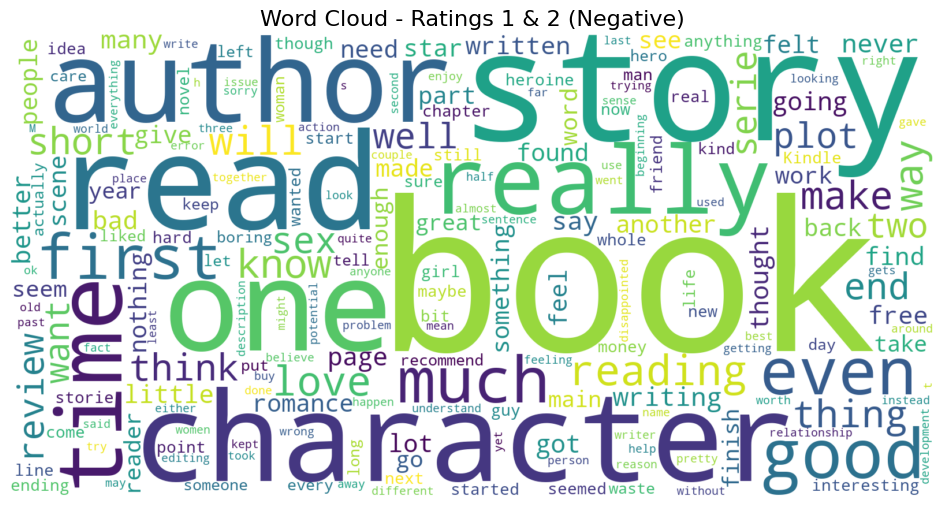

In [34]:
# Generate and display a word cloud for reviews with ratings 1 & 2 (negative sentiment)

make_wordcloud(text_12, "Word Cloud - Ratings 1 & 2 (Negative)")

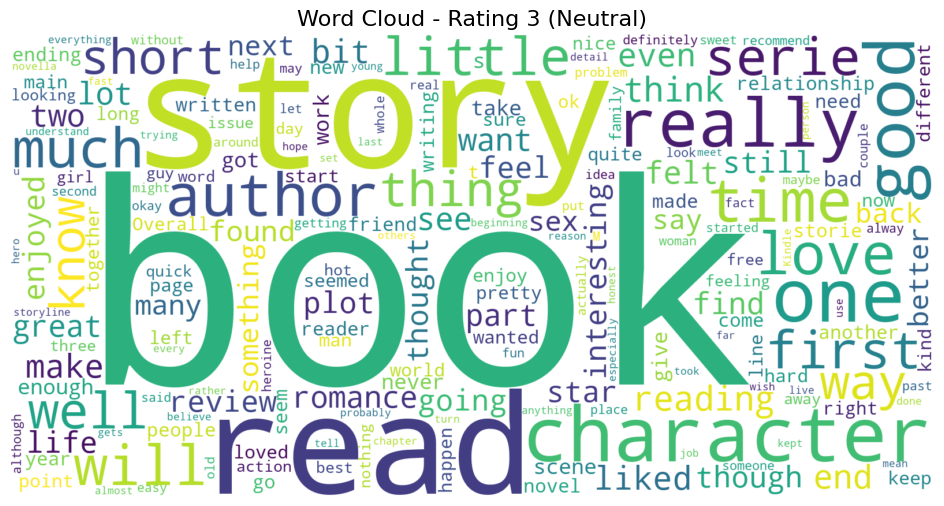

In [35]:
# Generate and display a word cloud for reviews with rating 3 (neutral sentiment)

make_wordcloud(text_3, "Word Cloud - Rating 3 (Neutral)")

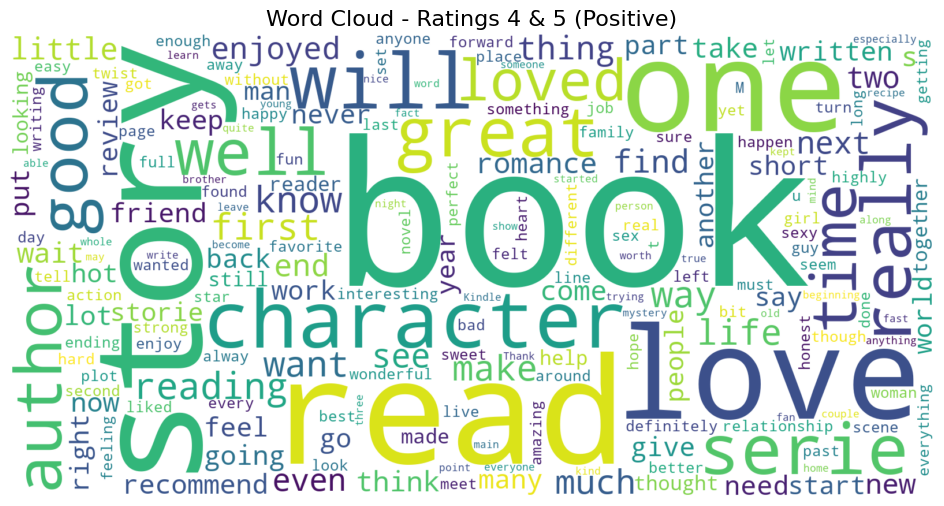

In [36]:
# Generate and display a word cloud for reviews with ratings 4 & 5 (positive sentiment)

make_wordcloud(text_45, "Word Cloud - Ratings 4 & 5 (Positive)")

> **Note:**  
> The word clouds show the most frequent words for each sentiment category.  
> Some words like "book", "story", and "read" reflect the Kindle domain rather than sentiment.
> These domain words are common across all sentiment categories and may not contribute directly to distinguishing positive or negative reviews, but they provide context about the type of content being reviewed. 
> There are no words that are exclusively tied to one sentiment category, which can be explained by the presence of negation (e.g., "not good" would contain the word "good" but is actually negative).  
> Symbols or special characters visible in the clouds suggest that the text requires cleaning before tokenization and modeling.

In [48]:
# Stratified sample: 2000 reviews per rating
df_sample = df.groupby('overall', group_keys=False).apply(lambda x: x.sample(n=2000, random_state=42))

# Function to compute polarity
def get_polarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Compute polarity for the stratified sample
df_sample['polarity'] = df_sample['reviewText'].apply(get_polarity)

# Map ratings to sentiment classes
def rating_to_class(r):
    if r <= 2:
        return 'negative'
    elif r == 3:
        return 'neutral'
    else:
        return 'positive'

df_sample['sentiment_class'] = df_sample['overall'].apply(rating_to_class)

# Check average polarity per class
print(df_sample.groupby('sentiment_class')['polarity'].mean())

# Optional: show reviews that might be inconsistent
# For example, negative reviews with positive polarity
inconsistent_reviews = df_sample[
    ((df_sample['sentiment_class'] == 'negative') & (df_sample['polarity'] > 0)) |
    ((df_sample['sentiment_class'] == 'positive') & (df_sample['polarity'] < 0))
]
print("\nSample of potentially inconsistent reviews:")
print(inconsistent_reviews[['overall', 'sentiment_class', 'polarity', 'reviewText']].head(10))

sentiment_class
negative    0.042129
neutral     0.177264
positive    0.269585
Name: polarity, dtype: float64

Sample of potentially inconsistent reviews:
        overall sentiment_class  polarity  \
873403        1        negative  0.248214   
266975        1        negative  0.600000   
411092        1        negative  0.280556   
839122        1        negative  0.173077   
1335          1        negative  0.182593   
582665        1        negative  0.039062   
862003        1        negative  0.035714   
615149        1        negative  0.083645   
269858        1        negative  0.156399   
404341        1        negative  0.800000   

                                               reviewText  
873403  There were many clever ideas in this story tha...  
266975  I wasn't impress with this book, maybe someone...  
411092  I knew this wasn't going to be a gret love sto...  
839122  I'm astounded by the 4 and 5 star reviews whic...  
1335    This had potential.  Decent story line.  

> **Note:**
> 
> The average polarity values for our stratified sample are:  
> - Negative: 0.042  
> - Neutral: 0.177  
> - Positive: 0.270  
> 
> These averages do not have to be strictly negative for the negative class, what matters is the relative ordering.  
> Here, we see that negative < neutral < positive, which matches the expected pattern.   
> 
> We also experimented with different ways to group the ratings into categories, but using 1-2 = negative, 3 = neutral, and 4-5 = positive resulted in the most balanced and interpretable distribution for training.
>
> Some reviews labeled as negative (ratings 1-2) show slightly positive polarity when analyzed with TextBlob.  
> This can happen because TextBlob is lexicon-based and scores words individually, so:  
> - Negations, sarcasm, or subtle phrasing may mislead the polarity calculation.  
> - Domain-specific words like "book", "story", or "character" are often neutral or slightly positive in the lexicon.  
> 
> Such inconsistencies are expected and do not invalidate the overall sentiment classes, as long as the general ordering (negative < neutral < positive) holds.  
> Minimal text cleaning (lowercasing, removing punctuation) can improve polarity estimates for these edge cases.


## Data Preprocessing and Cleaning

Before training Artificial Neural Networks, preprocessing steps are crucial:
1. **Handling Missing Values**: Imputing or removing rows with missing data.
2. **Text Cleaning**: Removing unnecessary characters, punctuation, and converting text to lowercase.
3. **Tokenization**: Breaking text into individual words.
4. **Removing Stop Words**: Filtering out common words like "and," "the," "of," etc., that do not contribute to the sentiment.
5. **Lemmatization/Stemming**: Reducing words to their base form (e.g., "running" to "run").

In [49]:
# Preview the first 5 rows

df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [53]:
# Drop Unecessary Columns

# df.drop(df.columns[[0, 8, 9]], axis=1, inplace=True)
df.drop(columns=['reviewerName'], inplace=True)

> **Note:**  
> The first column (`Unnamed: 0`) is likely an index column from the CSV import and does not contain meaningful data.  
> Columns 8 (`summary`), 9 (`unixReviewTime`), and `reviewerName` were dropped because:  
> - `summary` is optional and not being used in this model, so removing it simplifies preprocessing.  
> - `unixReviewTime` is redundant with `reviewTime` and is not needed for sentiment analysis.  
> - `reviewerName` is not relevant for sentiment prediction and may introduce unnecessary noise.  
> Dropping these columns helps reduce noise and memory usage without losing information relevant for training the ANN.

In [51]:
# Convert 'helpful' from string list "[num, denom]" to a float ratio between 0 and 1

def parse_helpful(val):
    try:
        # Convert string "[0, 0]" into a Python list [0, 0]
        nums = ast.literal_eval(val)
        if isinstance(nums, list) and len(nums) == 2:
            num, denom = nums
            return float(num) / float(denom) if denom != 0 else 0
        else:
            return 0
    except:
        return 0

# Apply conversion
df['helpful_ratio'] = df['helpful'].apply(parse_helpful)

In [88]:
# Map ratings to new sentiment classes: 1,2 -> -1; 3 -> 0; 4,5 -> 1

df['sentiment'] = df['overall'].map({1:-1, 2:-1, 3:0, 4:1, 5:1})

In [89]:
# Preview the first 20 rows

df.head(20)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,helpful_ratio,Year,sentiment
0,B000F83SZQ,"[0, 0]",5,i enjoy vintage books and movies so i enjoyed ...,2014-05-05,A1F6404F1VG29J,0.0,2014,1
1,B000F83SZQ,"[2, 2]",4,this book is a reissue of an old one the autho...,2014-01-06,AN0N05A9LIJEQ,1.0,2014,1
2,B000F83SZQ,"[2, 2]",4,this was a fairly interesting read it had old ...,2014-04-04,A795DMNCJILA6,1.0,2014,1
3,B000F83SZQ,"[1, 1]",5,id never read any of the amy brewster mysterie...,2014-02-19,A1FV0SX13TWVXQ,1.0,2014,1
4,B000F83SZQ,"[0, 1]",4,if you like period pieces clothing lingo you w...,2014-03-19,A3SPTOKDG7WBLN,0.0,2014,1
5,B000F83SZQ,"[0, 0]",4,a beautiful indepth character description make...,2014-05-26,A1RK2OCZDSGC6R,0.0,2014,1
6,B000F83SZQ,"[0, 0]",4,i enjoyed this one tho im not sure why its cal...,2014-06-10,A2HSAKHC3IBRE6,0.0,2014,1
7,B000F83SZQ,"[1, 1]",4,never heard of amy brewster but i dont need to...,2014-03-22,A3DE6XGZ2EPADS,1.0,2014,1
8,B000FA64PA,"[0, 0]",5,darth maul working under cloak of darkness com...,2013-10-11,A1UG4Q4D3OAH3A,0.0,2013,1
9,B000FA64PA,"[0, 0]",4,this is a short story focused on darth mauls r...,2011-02-13,AQZH7YTWQPOBE,0.0,2011,1


> **Note:**
> 
> The `helpful_ratio` column is derived from the original `helpful` column, which indicates how many users found a review helpful out of the total votes (e.g., `[2, 3]`).  
> It is calculated as `num / denom`, resulting in a float between 0 and 1.  
> This numeric ratio is easier to analyze, visualize, or optionally use in modeling.  
> During training, it could be helpful as a **weighting factor**, giving more importance to reviews that were deemed helpful by users.

In [57]:
# Drop the rows where there are no reviews

df.dropna(subset = ['reviewText'], inplace = True)

> **Note:**
> 
> Rows where `reviewText` is missing are dropped because the review text is the **primary input** for sentiment analysis.  
> Without review text, there is no data for the model to learn from, so these rows cannot contribute to training the ANN and are therefore removed.

In [91]:
# Changing the reviewTime column to be of datetime type

# df.reviewTime = pd.to_datetime(df.reviewTime)


# Creating a column with just the year

# df['Year'] = df.reviewTime.dt.year
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,helpful_ratio,Year,sentiment
0,B000F83SZQ,"[0, 0]",5,i enjoy vintage books and movies so i enjoyed ...,2014-05-05,A1F6404F1VG29J,0.0,2014,1
1,B000F83SZQ,"[2, 2]",4,this book is a reissue of an old one the autho...,2014-01-06,AN0N05A9LIJEQ,1.0,2014,1
2,B000F83SZQ,"[2, 2]",4,this was a fairly interesting read it had old ...,2014-04-04,A795DMNCJILA6,1.0,2014,1
3,B000F83SZQ,"[1, 1]",5,id never read any of the amy brewster mysterie...,2014-02-19,A1FV0SX13TWVXQ,1.0,2014,1
4,B000F83SZQ,"[0, 1]",4,if you like period pieces clothing lingo you w...,2014-03-19,A3SPTOKDG7WBLN,0.0,2014,1


In [61]:
# Convert reviewText to str explicitly before preprocessing

df['reviewText'] = df['reviewText'].astype(str)

In [90]:
# Check the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982597 entries, 0 to 982618
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   asin           982597 non-null  object        
 1   helpful        982597 non-null  object        
 2   overall        982597 non-null  int64         
 3   reviewText     982597 non-null  object        
 4   reviewTime     982597 non-null  datetime64[ns]
 5   reviewerID     982597 non-null  object        
 6   helpful_ratio  982597 non-null  float64       
 7   Year           982597 non-null  int32         
 8   sentiment      982597 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(4)
memory usage: 71.2+ MB


> **Text Preprocessing Overview**
> 
> To prepare the reviews for sentiment analysis, we apply several cleaning steps to the **`reviewText`** column.  
These steps help remove noise and standardize the text so the model can learn meaningful patterns.
> The preprocessing includes:
> - Removing punctuation
> - Keeping only alphabetical words
> - Converting all text to lowercase
> - Removing English stopwords
> - Lemmatizing words to their base form
> The following code performs all these transformations step by step.

In [74]:
# Example: Display one negative (1 star) and one positive (5 star) review
# This helps us see how the text looks before preprocessing and how negative/positive words are handled,
# especially in relation to stopwords removal and text cleaning

# Select a negative review (rating 1)
neg_review = df[df['overall'] == 1].iloc[3]['reviewText']
print("Negative review (1 star):\n", neg_review, "\n")

# Select a positive review (rating 5)
pos_review = df[df['overall'] == 5].iloc[9]['reviewText']
print("Positive review (5 stars):\n", pos_review)

Negative review (1 star):
 The WSJ for Kindle is overpriced, and the customer service has gone completely haywire since the newspaper was bought out.  I have read and subscribed by Kindle, print edition, and iPhone app (WSJ Mobile).  Unfortunately, they are all horrible in contebt delivery--even though the writing is still superb--and try calling them.  10 minute waits to speak to someone in a different country who will put you on hold, and then when you try to cancel, it is abysmal.  More waiting.  I will never be part of WSJ Online, pinrt, Mobile or Kindle after my recent experiences.  Again, the company has been bought out and is now on its way out.  Beware. 

Positive review (5 stars):
 Great book couldn't put it down.  The story expands events in the new Jedi order series.  Good writer in Walter Jon Williams.


In [76]:
# Create a translation table to remove all punctuation
punc = str.maketrans('', '', string.punctuation)

# Apply punctuation removal to the entire reviewText column
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join(word.translate(punc) for word in str(x).split()))

# Select the negative review (rating 1) and the positive review (rating 5)
neg_review_clean = df[df['overall'] == 1].iloc[3]['reviewText']
pos_review_clean = df[df['overall'] == 5].iloc[9]['reviewText']

# Print the two cleaned examples
print("Negative review (1 star) - Punctuation removed:\n", neg_review_clean, "\n")
print("Positive review (5 stars) - Punctuation removed:\n", pos_review_clean)

Negative review (1 star) - Punctuation removed:
 The WSJ for Kindle is overpriced and the customer service has gone completely haywire since the newspaper was bought out I have read and subscribed by Kindle print edition and iPhone app WSJ Mobile Unfortunately they are all horrible in contebt deliveryeven though the writing is still superband try calling them 10 minute waits to speak to someone in a different country who will put you on hold and then when you try to cancel it is abysmal More waiting I will never be part of WSJ Online pinrt Mobile or Kindle after my recent experiences Again the company has been bought out and is now on its way out Beware 

Positive review (5 stars) - Punctuation removed:
 Great book couldnt put it down The story expands events in the new Jedi order series Good writer in Walter Jon Williams


> **Note:**
>  
> All punctuation characters are removed from the `reviewText` column using a translation table.  
> This step simplifies the text for tokenization and ensures that punctuation does not interfere with word matching or embedding generation.  

In [78]:
# Remove all non-alphabetical words from each review
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join(word for word in str(x).split() if word.isalpha()))

# Select the negative review (rating 1) and positive review (rating 5)
neg_review_alpha = df[df['overall'] == 1].iloc[3]['reviewText']
pos_review_alpha = df[df['overall'] == 5].iloc[9]['reviewText']

# Print the two cleaned examples
print("Negative review (1 star) - Only alphabetical words:\n", neg_review_alpha, "\n")
print("Positive review (5 stars) - Only alphabetical words:\n", pos_review_alpha)

Negative review (1 star) - Only alphabetical words:
 The WSJ for Kindle is overpriced and the customer service has gone completely haywire since the newspaper was bought out I have read and subscribed by Kindle print edition and iPhone app WSJ Mobile Unfortunately they are all horrible in contebt deliveryeven though the writing is still superband try calling them minute waits to speak to someone in a different country who will put you on hold and then when you try to cancel it is abysmal More waiting I will never be part of WSJ Online pinrt Mobile or Kindle after my recent experiences Again the company has been bought out and is now on its way out Beware 

Positive review (5 stars) - Only alphabetical words:
 Great book couldnt put it down The story expands events in the new Jedi order series Good writer in Walter Jon Williams


> **Note:**
> 
> Non-alphabetical words (numbers, symbols, or mixed characters) are removed from all reviews to reduce noise in the text.  
> Printing the fixed negative and positive examples illustrates how this step simplifies the text while retaining meaningful words for sentiment analysis.

In [79]:
# Convert all words in each review to lowercase
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join(word.lower() for word in str(x).split()))

# Select the negative review (rating 1) and positive review (rating 5)
neg_review_lower = df[df['overall'] == 1].iloc[3]['reviewText']
pos_review_lower = df[df['overall'] == 5].iloc[9]['reviewText']

# Print the two cleaned examples
print("Negative review (1 star) - Lowercase:\n", neg_review_lower, "\n")
print("Positive review (5 stars) - Lowercase:\n", pos_review_lower)

Negative review (1 star) - Lowercase:
 the wsj for kindle is overpriced and the customer service has gone completely haywire since the newspaper was bought out i have read and subscribed by kindle print edition and iphone app wsj mobile unfortunately they are all horrible in contebt deliveryeven though the writing is still superband try calling them minute waits to speak to someone in a different country who will put you on hold and then when you try to cancel it is abysmal more waiting i will never be part of wsj online pinrt mobile or kindle after my recent experiences again the company has been bought out and is now on its way out beware 

Positive review (5 stars) - Lowercase:
 great book couldnt put it down the story expands events in the new jedi order series good writer in walter jon williams


> **Note:**
> 
> Converting all text to lowercase ensures uniformity, so that the same word in different cases (e.g., "Good" vs "good") is treated identically during tokenization and modeling.  

In [80]:
# Take a random sample for testing (e.g., 10% of dataset)
df_sample = df.sample(frac=0.1, random_state=42)
print(f"Sample size for testing: {len(df_sample)}")

# Apply language detection again on the cleaned text
df_sample['language'] = df_sample['reviewText'].apply(detect_language)

print("Language distribution in sample after cleaning:")
print(df_sample['language'].value_counts())

Sample size for testing: 98260
Language distribution in sample after cleaning:
language
en       98145
de          36
af          19
es          12
sl           7
sk           5
cy           5
no           5
ro           5
fr           3
et           3
so           2
it           2
nl           2
ca           2
sv           1
error        1
tl           1
pl           1
id           1
da           1
sw           1
Name: count, dtype: int64


In [81]:
# Filter only non-English reviews in the sample
df_non_english = df_sample[df_sample['language'] != 'en']

# See how many there are
print(f"Number of non-English reviews in sample: {len(df_non_english)}")

# Display a few examples
print(df_non_english[['reviewText', 'language']].head(40))

Number of non-English reviews in sample: 115
                                               reviewText language
83701   regiokrimi at its best am anfang so idyllisch ...       de
630915                                                 ok       sk
499954  me gustoacute muy bien escrita me encanto docu...       es
947891                                           loved it       sl
79319   professor froebius der in seiner heimatstadt d...       de
150070  wer den bullen reizt ein wahnsinnsspannender a...       de
401148                              very interesting book       af
504012                                        good series       af
230796                         i enjoy collecting recipes       ca
78750   wie die woumlrter zu worten wie die worte zur ...       de
943073                                            enjoyed       no
118183  von andreas dresen kenne ich bereits einige ku...       de
111601  eine erzaumlhlweise wie man sie heutzutage eig...       de
90270   genschen 

In [82]:
lang_counts = df_sample['language'].value_counts(normalize=True) * 100
print(lang_counts)

language
en       99.882964
de        0.036637
af        0.019336
es        0.012212
sl        0.007124
sk        0.005089
cy        0.005089
no        0.005089
ro        0.005089
fr        0.003053
et        0.003053
so        0.002035
it        0.002035
nl        0.002035
ca        0.002035
sv        0.001018
error     0.001018
tl        0.001018
pl        0.001018
id        0.001018
da        0.001018
sw        0.001018
Name: proportion, dtype: float64


> **Language Detection Results:**  
>  
> A 10% sample of the cleaned dataset was analyzed to estimate the proportion of English vs. non-English reviews.  
> The results show that **99.88%** of the reviews are English, with only a tiny fraction labeled as other languages.  
>  
> Upon manually inspecting several of the reviews detected as non-English, we observed that most of them were **short English sentences**, such as single phrases or simple expressions. These short texts often lack enough linguistic structure for automatic language detection, which explains why they are sometimes misclassified (e.g., labeled as “de”).  
>  
> Because the dataset is overwhelmingly English and the few misclassifications correspond to **valid English reviews**, keeping them will **not negatively impact the ANN model**. Their proportion is too small to affect training, and removing them would unnecessarily shrink the dataset.  
>  
> Therefore, **no language filtering is required**, and all reviews can safely be kept for the sentiment analysis task.

In [85]:
# Save a Checkpoint before removing stopwords

df.to_csv("checkpoint_before_stopwords.csv", index=False)
print("Checkpoint saved!")

Checkpoint saved!


In [86]:
# Get the optimized stopwords list
stopwords_list = get_revised_stopwords()

print(stopwords_list)

{"you'd", "i'm", 'm', 'our', "you've", 'this', 'do', 've', 'until', 'ma', 'why', 'ours', "she'll", 'just', 'him', "i'd", "it'll", "he's", 'between', "it's", 'here', 'be', 'before', 'them', 'i', 'both', 'few', 'its', 'hers', "we'll", "he'd", 'my', 'his', 'there', 'such', 'yourself', 'under', 'am', 'whom', 'by', 's', 'were', 'your', 'that', 'yourselves', 'herself', "it'd", 'and', 'are', 'to', 'these', 'she', "they're", 'we', 'own', 'in', "we'd", "i've", 'as', 'then', 'can', 'through', 'having', 'while', 'other', 'themselves', 'itself', 'down', 'too', 'ourselves', 'because', "he'll", 'all', 'have', 'they', 'from', 'over', 'theirs', "you're", 'll', 'each', "we've", 're', 'those', 'or', 'been', 'the', 'will', 'being', 'a', 'has', 'now', 'than', "she'd", "they'd", 'myself', 'her', "they'll", "you'll", "we're", 'only', 'into', 'who', 'should', 'is', 'me', 'up', 'when', 'he', 'it', 'd', 'below', "she's", 'o', 'again', 'where', 'with', "that'll", 'if', 'had', "should've", 'further', 'which', "i

In [87]:
# Remove "but" from stopwords

stopwords_list.discard("but")

> **Note:**
>  
> The stopword list used here comes from the `revised-stopwords` package, which is optimized for sentiment analysis because it preserves important negations and sentiment-bearing words that NLTK normally removes.  
> We explicitly removed **"but"** from the stopword list as well, since contrastive words (e.g., “slow **but** amazing”) are crucial for understanding sentiment. Keeping such words ensures the model does not lose important emotional cues.

In [93]:
# Apply stopword removal using the optimized stopword list
df['reviewText'] = df['reviewText'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stopwords_list)
)

# Select the negative review (rating 1) and positive review (rating 5)
neg_review_stop = df[df['overall'] == 1].iloc[3]['reviewText']
pos_review_stop = df[df['overall'] == 5].iloc[9]['reviewText']

# Print the two cleaned examples
print("Negative review (1 star) - Stopwords removed:\n", neg_review_stop, "\n")
print("Positive review (5 stars) - Stopwords removed:\n", pos_review_stop)

Negative review (1 star) - Stopwords removed:
 wsj kindle overpriced customer service gone completely haywire since newspaper bought read subscribed kindle print edition iphone app wsj mobile unfortunately horrible contebt deliveryeven though writing still superband try calling minute waits speak someone different country put hold try cancel abysmal more waiting never part wsj online pinrt mobile kindle recent experiences company bought way beware 

Positive review (5 stars) - Stopwords removed:
 great book couldnt put story expands events new jedi order series good writer walter jon williams


> **Note:**
> 
> Stopword removal is applied using the optimized stopword list, which preserves important sentiment-bearing words. This ensures that the model doesn’t lose meaning during preprocessing.  
> We print one fixed negative and one fixed positive review to see how common stopwords are removed while sentiment-relevant words remain intact. This helps verify that the cleaning step does not distort sentiment polarity before training the model.

In [94]:
# Create a WordNet lemmatizer object
lem = WordNetLemmatizer()

# Apply lemmatization to each review
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join(lem.lemmatize(word, pos='v') for word in x.split()))

# Select the negative review (rating 1) and positive review (rating 5)
neg_review_lem = df[df['overall'] == 1].iloc[3]['reviewText']
pos_review_lem = df[df['overall'] == 5].iloc[9]['reviewText']

# Print the two lemmatized examples
print("Negative review (1 star) - Lemmatized:\n", neg_review_lem, "\n")
print("Positive review (5 stars) - Lemmatized:\n", pos_review_lem)

Negative review (1 star) - Lemmatized:
 wsj kindle overprice customer service go completely haywire since newspaper buy read subscribe kindle print edition iphone app wsj mobile unfortunately horrible contebt deliveryeven though write still superband try call minute wait speak someone different country put hold try cancel abysmal more wait never part wsj online pinrt mobile kindle recent experience company buy way beware 

Positive review (5 stars) - Lemmatized:
 great book couldnt put story expand events new jedi order series good writer walter jon williams


> **Note:**
> 
> Lemmatization reduces words to their base form (e.g., "running" → "run") to standardize the text and reduce sparsity in the model input.  
> Using the verb part-of-speech (`pos='v'`) helps preserve sentiment-relevant forms.  
> We print one example review to verify that words are correctly lemmatized while maintaining meaning.

In [95]:
# Preview the first 5 rows

df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,helpful_ratio,Year,sentiment
0,B000F83SZQ,"[0, 0]",5,enjoy vintage book movies enjoy read book plot...,2014-05-05,A1F6404F1VG29J,0.0,2014,1
1,B000F83SZQ,"[2, 2]",4,book reissue old one author bear era say nero ...,2014-01-06,AN0N05A9LIJEQ,1.0,2014,1
2,B000F83SZQ,"[2, 2]",4,fairly interest read old style terminologyi gl...,2014-04-04,A795DMNCJILA6,1.0,2014,1
3,B000F83SZQ,"[1, 1]",5,id never read amy brewster mysteries one reall...,2014-02-19,A1FV0SX13TWVXQ,1.0,2014,1
4,B000F83SZQ,"[0, 1]",4,like period piece clothe lingo enjoy mystery a...,2014-03-19,A3SPTOKDG7WBLN,0.0,2014,1


In [96]:
# Save the fully preprocessed dataset to a new CSV file
df.to_csv("kindle_reviews_cleaned.csv", index=False)

print("Preprocessed dataset saved as 'kindle_reviews_cleaned.csv'.")

Preprocessed dataset saved as 'kindle_reviews_cleaned.csv'.
